### Create Visualization with Historical and Forecast Data for Selected Zip Codes
This notebook creates visualizations for selected zip codes with following:

- zillow housing median values from 2012-01 to 2019-07
- forecast housing median values from 2019-08 to 2023-08 (5 years forecast period by month)
- 95% confidence interval of forecast values

In [1]:
#import relevant libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import pickle
import functions as fn

import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#open 
with open('pred_29zipcodes.pickle', 'rb') as f:
    top_forecast = pickle.load(f)

In [3]:
#inspect pickle
top_forecast.keys()

dict_keys([94085, 94086, 94087, 95112, 95117, 33805, 30238, 60064, 48033, 33830, 33705, 33069, 33714, 66102, 92356, 89030, 32839, 19146, 95051, 95050, 95054, 30032, 30288, 94041, 94043, 29405, 30315, 94063, 32117])

In [4]:
#open pickle containing top zipcodes with returns
with open('forecast_returns.pickle', 'rb') as f:
    top_returns = pickle.load(f)

In [5]:
#inspect pickle
top_returns.head()

,RegionName,Ann_returns
27,94063,0.220509
25,29405,0.213978
26,30315,0.206889
21,30032,0.194591
20,95054,0.194198


In [6]:
#convert to dictionary with from dataframe
top_returns_dict = dict(zip(top_returns['RegionName'], top_returns['Ann_returns']))

In [7]:
#load zillow dataframe
#get names for columns with only descriptive information
#melt overall dataframe
zillow_updated_df = pd.read_csv('Zip_Zhvi_SingleFamilyResidence.csv', encoding='ISO-8859-1')
cols_info = list(zillow_updated_df.columns[:7])
melt_df = fn.df_melt(zillow_updated_df, cols_info)

In [8]:
#get zipcodes for top area
top_zip = list(top_forecast.keys())

In [9]:
#extract data series for each zipcode and store in dictionary from melted dataframe
top_zip_df = {}

for zipcode in top_zip:
    ts_df = melt_df.loc[melt_df['RegionName']==zipcode][['time', 'value']]
    ts_df.set_index('time', inplace=True)
    
    top_zip_df[zipcode] = ts_df

In [10]:
#get city, state, metro information for top 20 zipcodes
top_zip_info = {}

for zipcode in top_zip:
    top_zip_info[zipcode] = fn.retrieve_zip_info(zillow_updated_df, zipcode, 'RegionName')
    

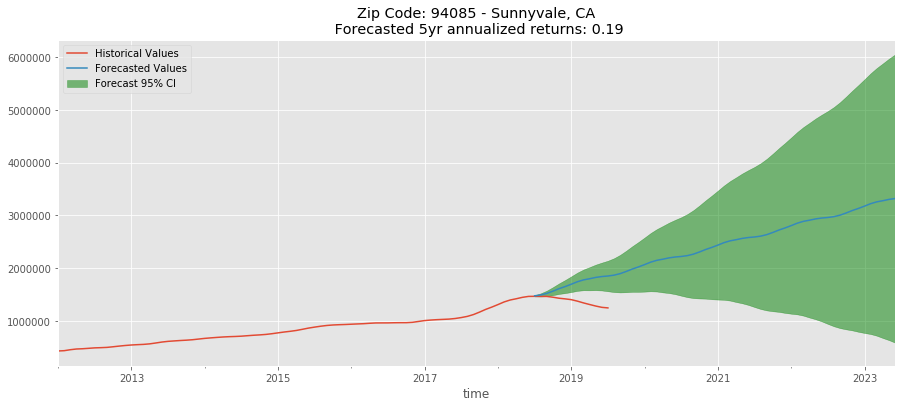

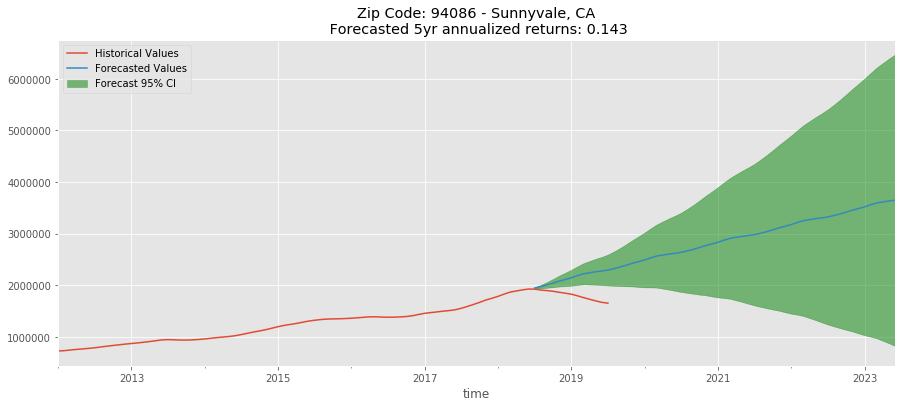

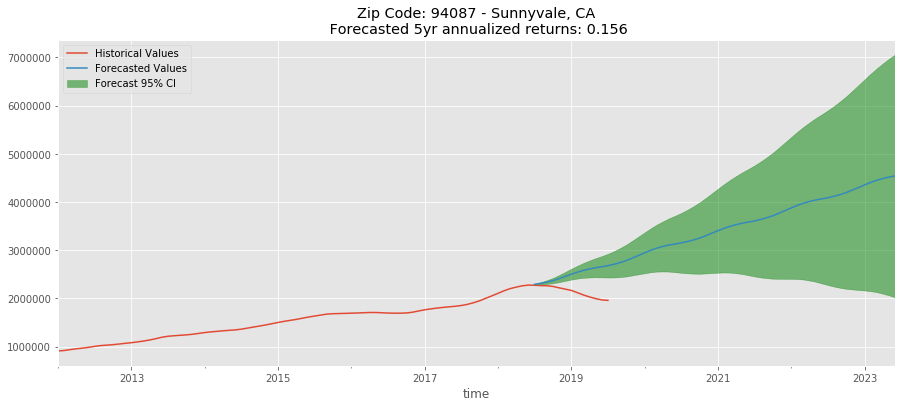

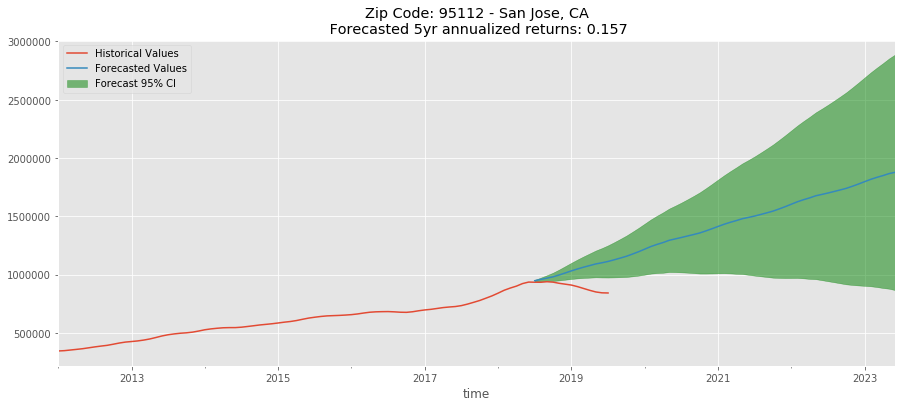

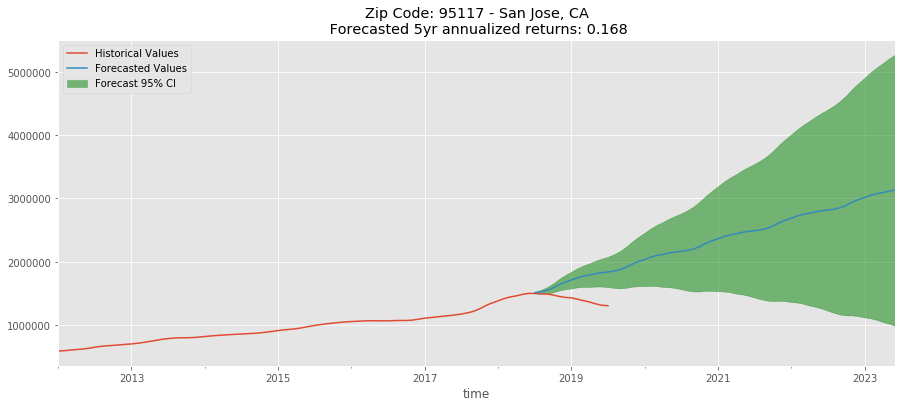

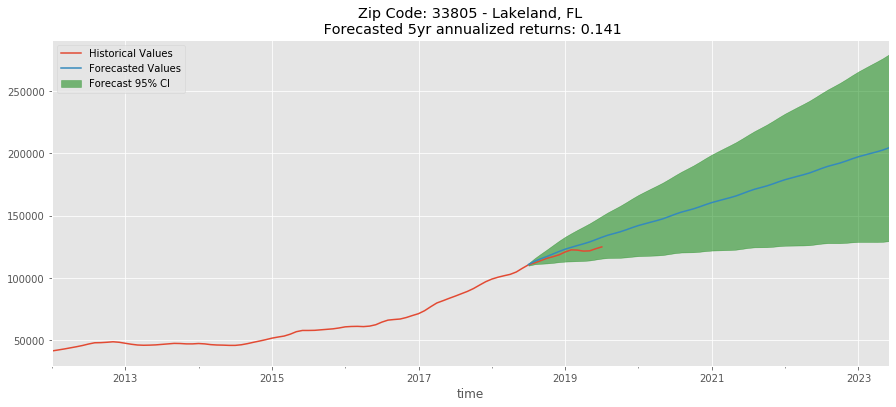

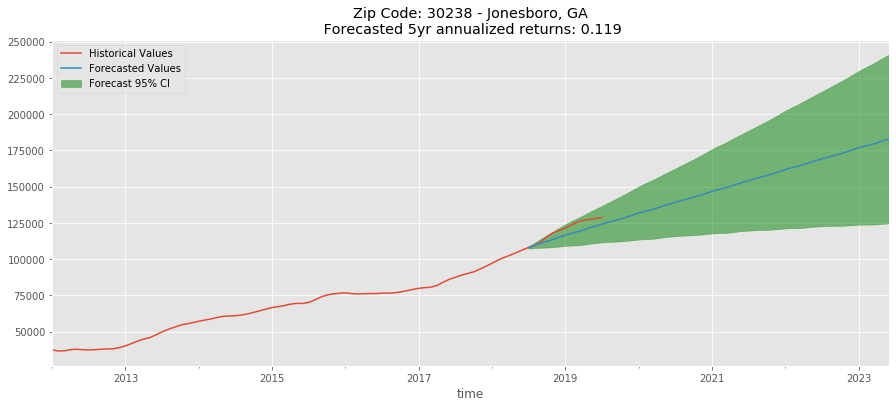

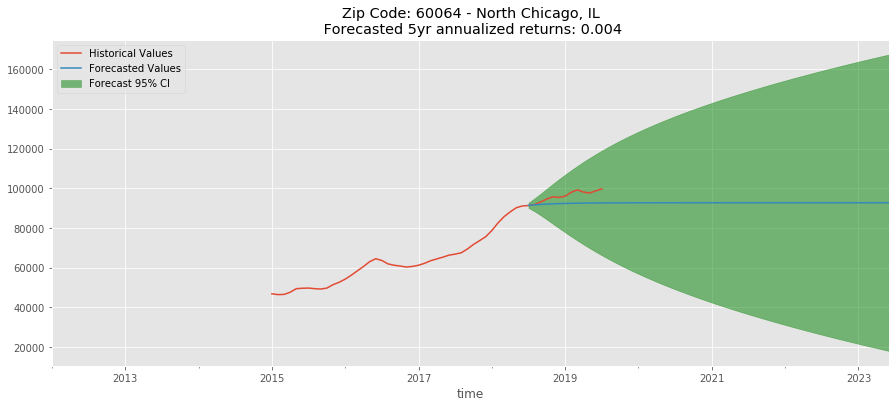

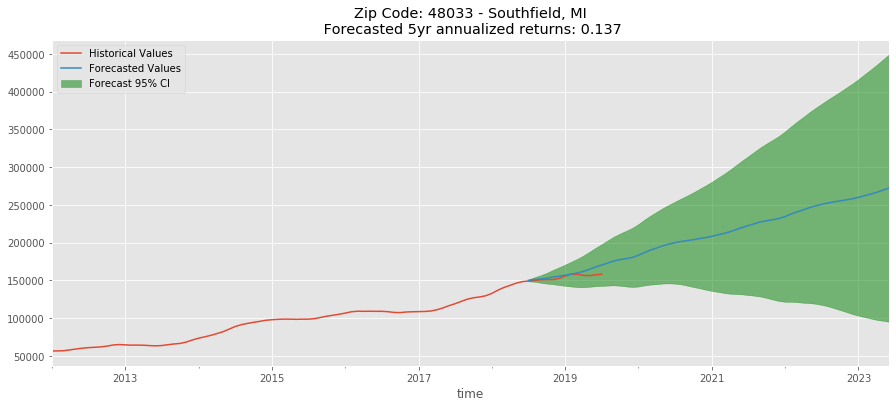

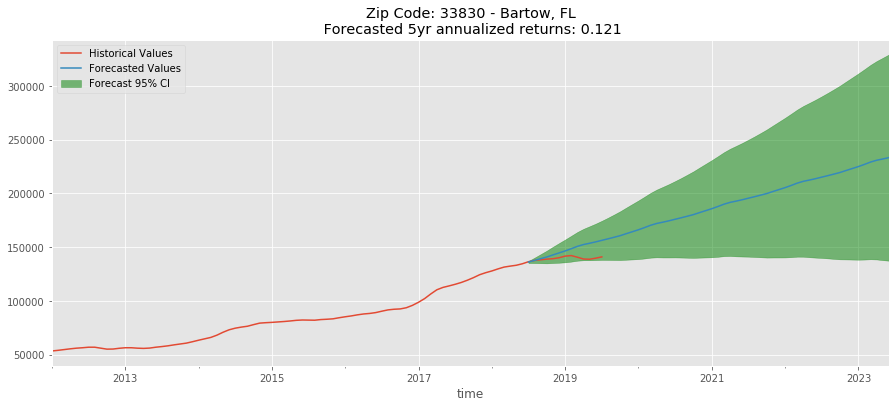

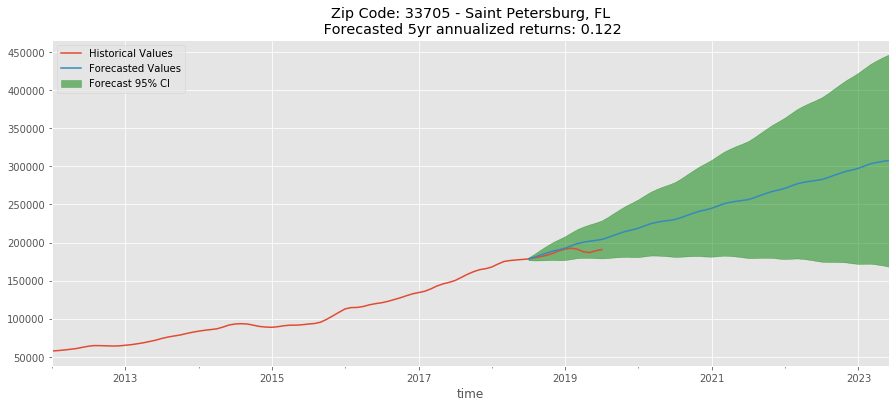

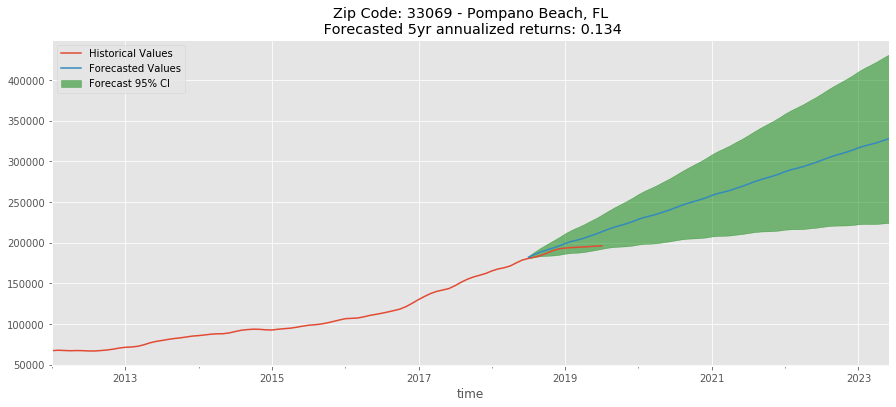

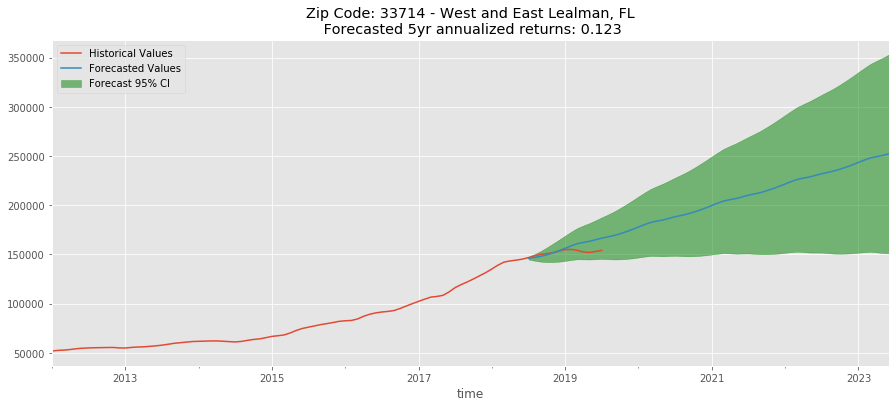

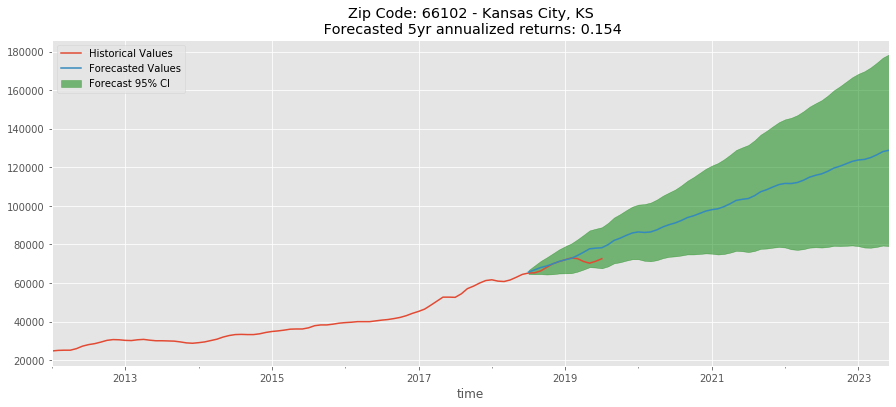

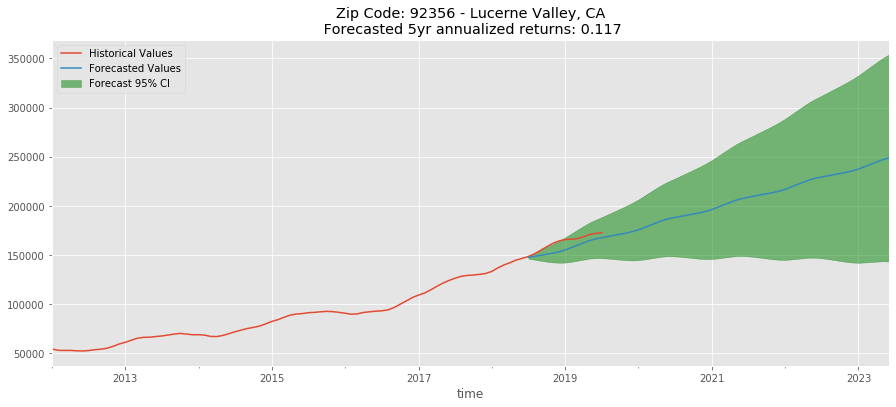

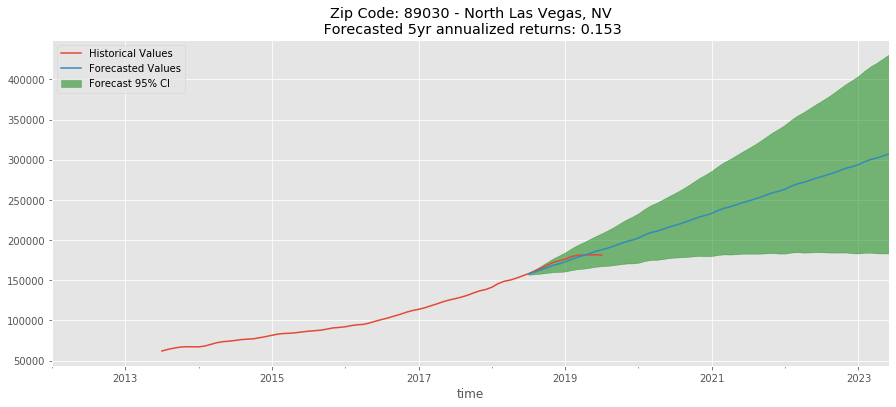

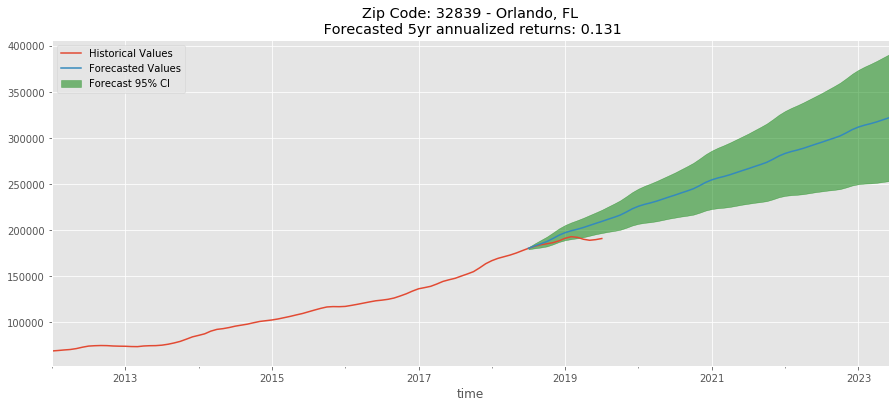

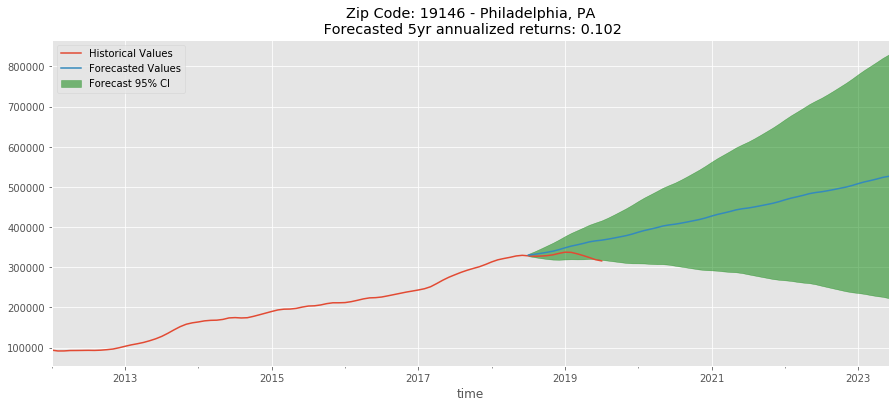

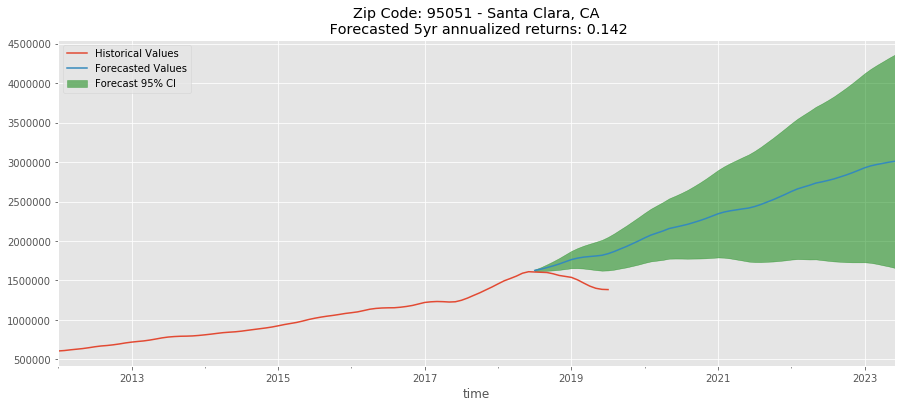

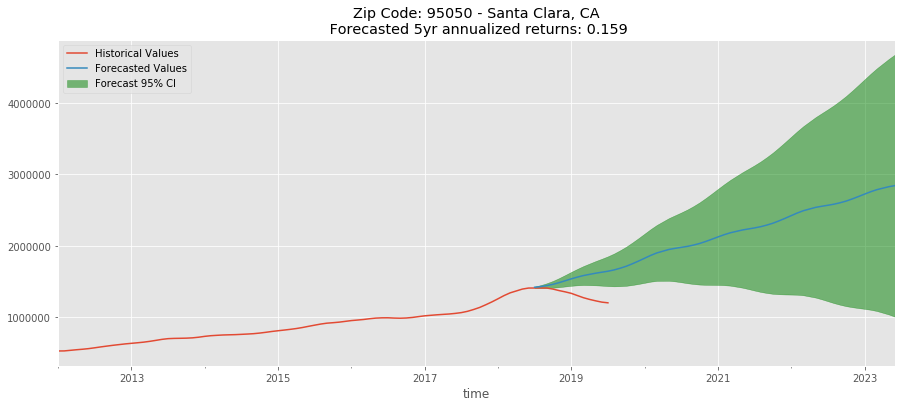

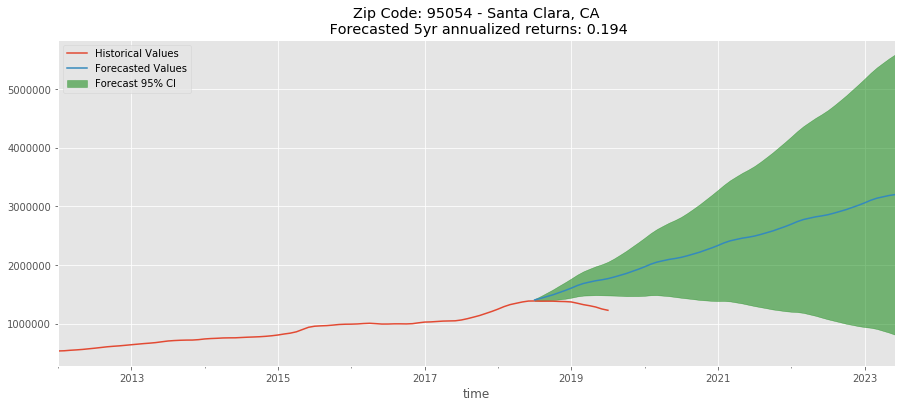

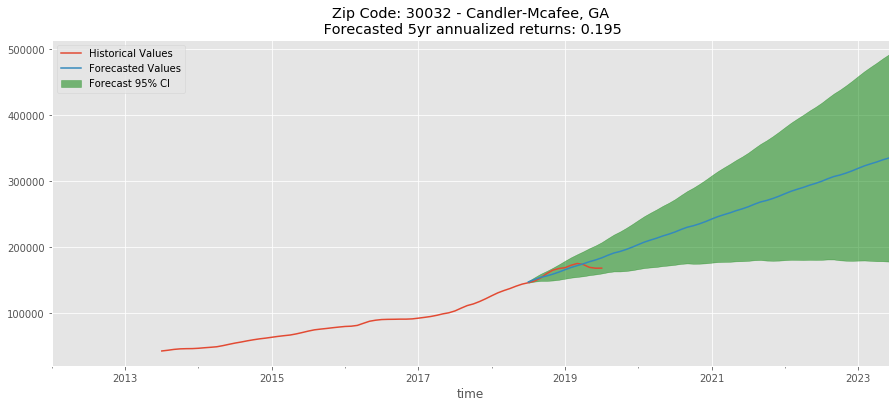

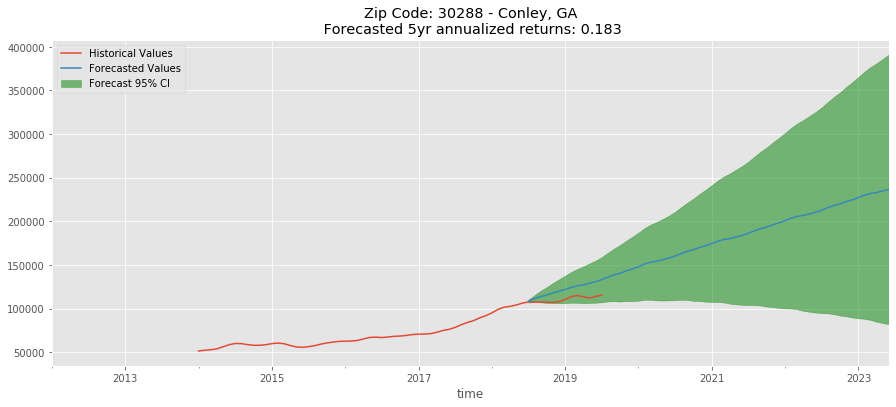

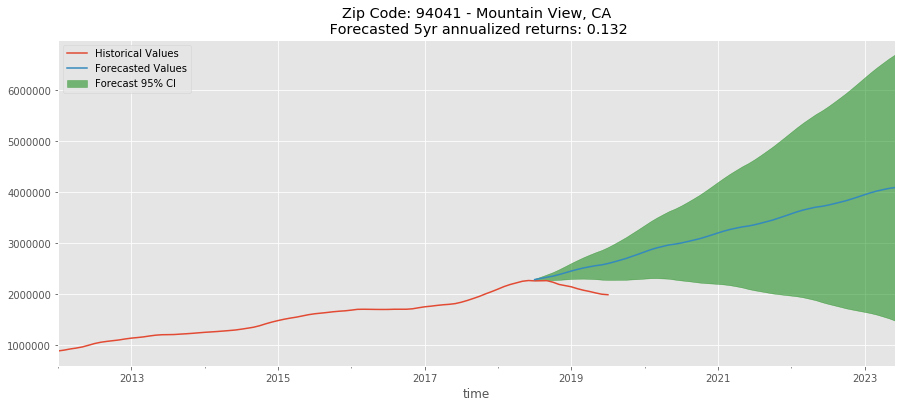

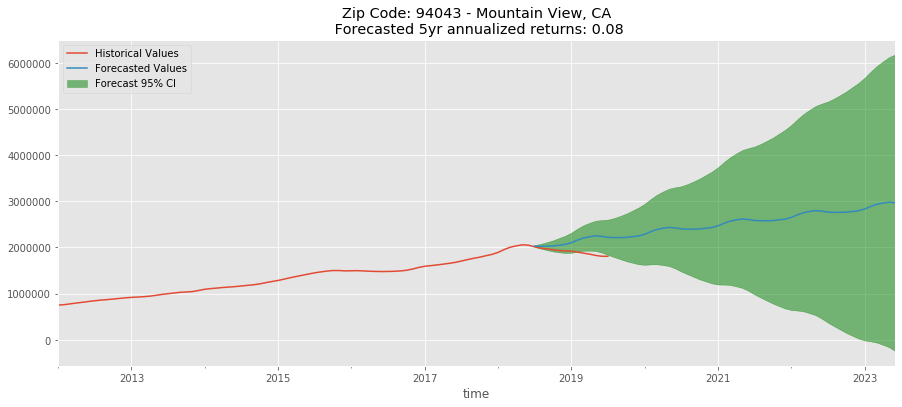

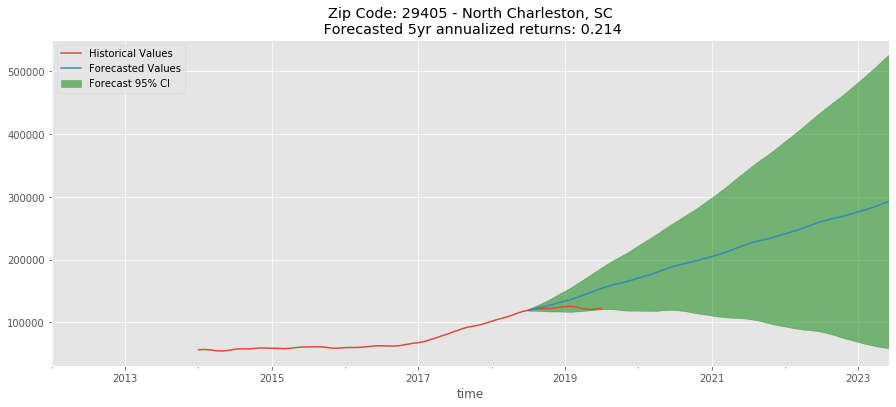

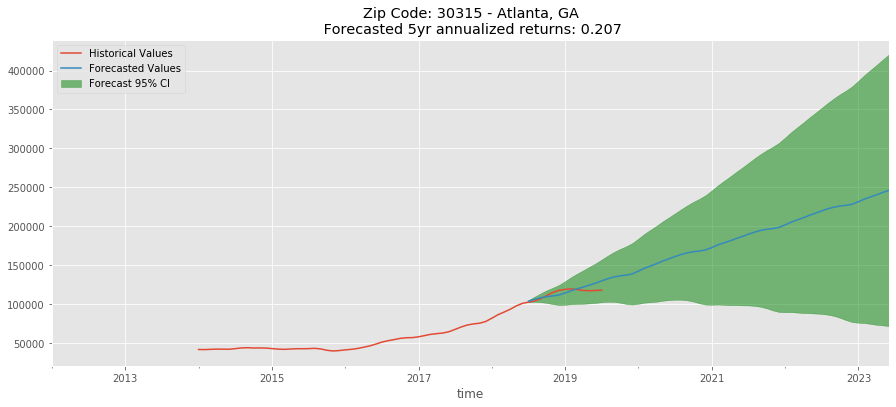

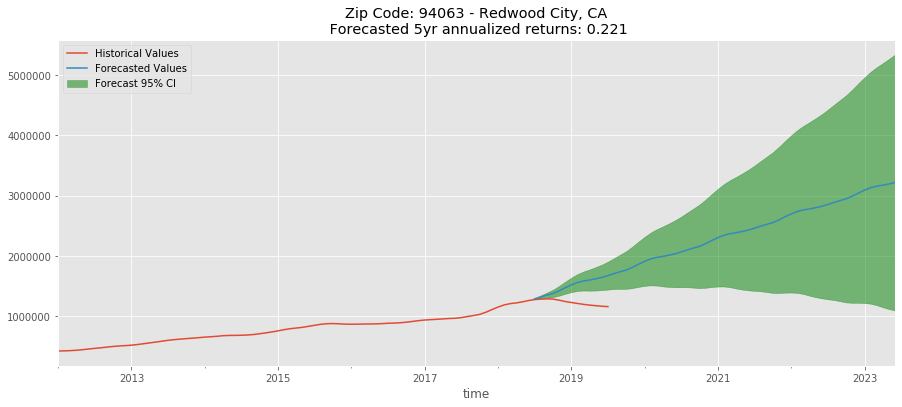

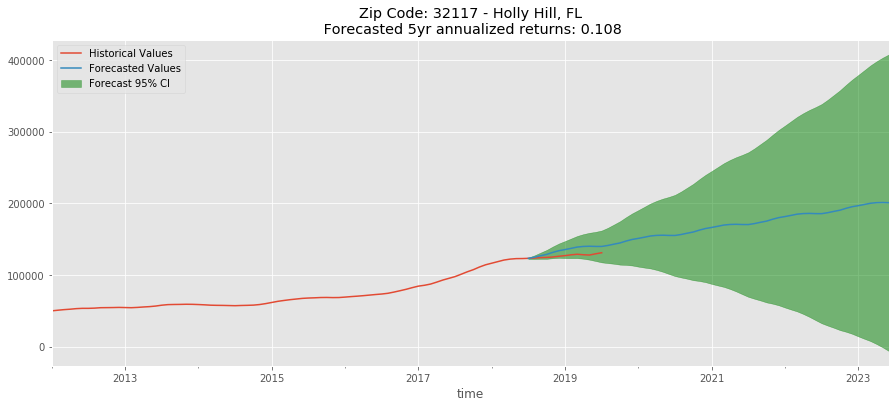

In [11]:
#plot graphs with prediction forecast and confidence intervals
for key in top_zip:
    
    #plot historical values from 2012-01 to 2019-07
    top_zip_df[key]['2012':].plot(figsize=(15,6), legend=False);
    #plot forecasted values from 2018-06 to 2023-06
    top_forecast[key].predicted_mean.plot();
    
    #plot confidence intervals for forecasted values
    pred_conf = top_forecast[key].conf_int()
    plt.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5);
    
    #create title/subtitle and legends
    roi = str(round(top_returns_dict[key], 3))
    title = ('Zip Code: '+str(key) + ' - ' + top_zip_info[key]['City'] + ', ' + top_zip_info[key]['State'] + 
             '\n Forecasted 5yr annualized returns: '+roi)
    
    plt.title(title)
    plt.legend(['Historical Values', 'Forecasted Values', 'Forecast 95% CI'], loc=2 )